# Amazon Fine Food Reviews Analysis

In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from nltk.stem.porter import PorterStemmer

In [2]:
con = sqlite3.connect('./amazon-fine-food-reviews/database.sqlite')

In [3]:
type(con)

sqlite3.Connection

In [4]:
filtered_data = pd.read_sql_query("SELECT * FROM Reviews WHERE Score != 3",con)

In [5]:
def partition(x):
    if x< 3:
        return 'negative'
    else:
        return 'positive'

In [6]:
actual_Score = filtered_data['Score']

In [7]:
positiveNegative = actual_Score.map(partition)

In [8]:
filtered_data['Score']=positiveNegative

In [9]:
filtered_data.shape

(525814, 10)

In [10]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
display=pd.read_sql_query("Select * from Reviews where score != 3 and UserId='AR5J8UI46CURR' ORDER BY PRODUCTID",con)

In [12]:
display.shape

(5, 10)

In [13]:
display

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [14]:
sorted_data=filtered_data.sort_values("ProductId",axis=0,ascending=True,inplace=False,kind='quicksort',na_position = 'last')

In [15]:
final=sorted_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'},keep='first',inplace=False)

In [16]:
final.shape

(364173, 10)

In [17]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...


In [18]:
display=pd.read_sql_query("Select * from Reviews where score != 3 and Id = 44737 or Id = 64422 order BY ProductId",con)
display

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
1,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [19]:
final = final[final.HelpfulnessNumerator <= final.HelpfulnessDenominator]

In [20]:
final.shape

(364171, 10)

In [21]:
final['Score'].value_counts() #Imbalanced Dataset

positive    307061
negative     57110
Name: Score, dtype: int64

In [22]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english'))

sno = nltk.stem.SnowballStemmer('english')

def cleanhtml(sentence):
    clean = re.compile('<.*?>')
    cleantext = re.sub(clean,'',sentence)
    return cleantext

def cleanpunc(sentence):
    cleaned = re.sub(r'[?|\'|"#]',r'',sentence)
    cleantext = re.sub(r'[.|,)|(|\|/)]',r'',cleaned)
    return cleaned 

print(stop)
print(sno.stem('TaSty'))


{'hasn', 'into', 'm', 'between', 'down', 'ours', "hadn't", 'too', 'y', 'where', "wasn't", 'has', 've', 'such', "mustn't", 'your', "didn't", 'were', 'herself', 'wouldn', 'only', 'does', 'our', 'they', 'some', "you're", 'hers', 'of', 'do', 'why', 'or', 'himself', 'for', 'few', 'which', 'no', "don't", "needn't", 'both', "weren't", 's', 'should', 'up', 'them', 'yours', 'will', 'about', "she's", 'if', 'again', 'very', 'and', 'there', 'don', 'shouldn', 'had', 'most', "shouldn't", 'once', 'then', 'my', 'wasn', 'under', 'who', 'above', 'been', 'off', "isn't", 'he', "hasn't", 'me', 'll', 'theirs', 'what', 'that', 'so', 'their', 'when', 'him', 'here', 'can', 'after', "should've", 'same', 'isn', 'we', 'in', 'weren', 'further', 'below', 'a', 'now', 'whom', 'any', 'by', "you've", 'is', 'its', 'all', 'you', 'not', "shan't", 'because', 'couldn', 'through', 'yourselves', 'doesn', 'hadn', 'his', "doesn't", 'during', 'have', 'while', 'i', 'own', 'with', "you'll", 'this', 'doing', 'until', "you'd", 'aren

In [23]:
i=0
str1=''
final_string = []

all_positive_words=[]
all_negative_words=[]

s = ''
for sent in final['Text'].values:
    filtered_sentence=[]
    sent = cleanhtml(sent)
    for w in sent.split():  #str.split() with no arguments strips away all the whitespace. 
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
                if (cleaned_words.lower() not in stop):
                    s= (sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    
                    if(final['Score'].values)[i] == 'positive' :
                        all_positive_words.append(s)
                    
                    if(final['Score'].values)[i] == 'negative' :
                        all_negative_words.append(s)
                    else:
                        continue
                else:
                    continue
    str1 = b"".join(filtered_sentence)    
    final_string.append(str1)
    i=i+1            

In [24]:
final['CleanedText'] = final_string

In [25]:
#final.head(3)

In [26]:
conn = sqlite3.connect('final.sqlite')

In [27]:
c=conn.cursor()

In [28]:
conn.text_factory = str

In [29]:
final.to_sql('Reviews',conn,flavor = None,schema = None,if_exists='replace',index = True , index_label = None,chunksize = None,dtype =None)

# BOW

In [30]:
count_vect = CountVectorizer()
final_counts = count_vect.fit_transform(final['Text'].values)

In [31]:
final_counts.get_shape()

(364171, 115281)

In [32]:
target=final['Score']

In [33]:
features=final_counts[0:1000,:]

In [34]:
target=target[0:1000]

In [35]:
features=features.toarray()

In [36]:
type(features)

numpy.ndarray

In [37]:
import pandas as pd
features=pd.DataFrame(features)

In [38]:
#d=pd.DataFrame(final_counts.todense())

In [39]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,115271,115272,115273,115274,115275,115276,115277,115278,115279,115280
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
target.head()

138706    positive
138688    positive
138689    positive
138690    positive
138691    positive
Name: Score, dtype: object

In [41]:
target.shape

(1000,)

In [42]:
features.shape

(1000, 115281)

In [43]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,115271,115272,115273,115274,115275,115276,115277,115278,115279,115280
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
final_counts.shape

(364171, 115281)

In [50]:
final_counts[:1000]

<1000x115281 sparse matrix of type '<class 'numpy.int64'>'
	with 59467 stored elements in Compressed Sparse Row format>

In [51]:
target.shape

(1000,)

# TF-IDF

In [38]:
tf_idf_vect = TfidfVectorizer() #unigram

In [39]:
final_tf_idf = tf_idf_vect.fit_transform(final['Text'].values)

In [40]:
final_tf_idf.get_shape()

(364171, 115281)

In [41]:
features = tf_idf_vect.get_feature_names()

In [42]:
tfidf_features=final_tf_idf[0:1000].toarray()

In [43]:
def top_tfidf_feats(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(final_tf_idf[1,:].toarray()[0],features,2500)

In [44]:
top_tfidf.shape

(2500, 2)

In [45]:
top_tfidf.head()

,feature,tfidf
0,paperbacks,0.341322
1,sendak,0.304084
2,rosie,0.298090
3,incorporates,0.272424
4,pages,0.249370


In [46]:
features=top_tfidf['tfidf']

In [47]:
features.head()

0    0.341322
1    0.304084
2    0.298090
3    0.272424
4    0.249370
Name: tfidf, dtype: float64

In [48]:
top_tfidf.head()

,feature,tfidf
0,paperbacks,0.341322
1,sendak,0.304084
2,rosie,0.298090
3,incorporates,0.272424
4,pages,0.249370


In [62]:
from sklearn.preprocessing import StandardScaler
features = StandardScaler().fit_transform(tfidf_features)

In [63]:
import pandas as pd
features=pd.DataFrame(features)

# Word2vec

In [49]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

C:\Users\karti\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [50]:
import gensim
i=0
list_of_sent=[]
for sent in final['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [51]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)      

In [52]:
words = list(w2v_model.wv.vocab)
print(len(words))

29950


In [53]:
count_vect = CountVectorizer()
final_counts = count_vect.fit_transform(final['Text'].values)

In [54]:
count_vect_feat = count_vect.get_feature_names() # list of words in the BoW
count_vect_feat.index('like')
print(count_vect_feat[64055])

like


# Avg W2V.TFIDF-W2V

In [55]:
#import numpy as np
#np.seterr(divide='ignore', invalid='ignore')

In [56]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

C:\Users\karti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


364171
50


In [57]:
type(sent_vectors)

list

In [58]:
from sklearn.preprocessing import Imputer

trainDataVecs = Imputer().fit_transform(sent_vectors)

In [59]:
a=np.array(trainDataVecs)

In [60]:
avgw2v=pd.DataFrame(a)

In [61]:
# from sklearn.preprocessing import StandardScaler
# standardized_data = StandardScaler().fit_transform(a)

In [62]:
# standardized_data.shape

In [63]:
# features=standardized_data[:1000]

In [64]:
features=a[:1000]


 The optimal number of neighbors is 1.


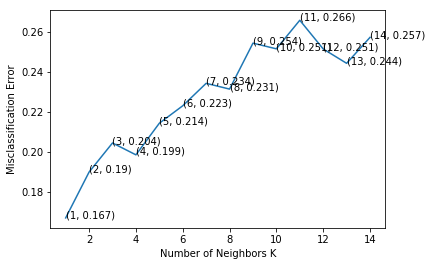

the misclassification error for each k value is :  [ 0.167  0.19   0.204  0.199  0.214  0.223  0.234  0.231  0.254  0.251
  0.266  0.251  0.244  0.257]


In [68]:
from sklearn import tree
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(features,target,test_size=0.3, random_state=0)

depth= list(range(1,15))

cv_scores=[]

for k in depth:
    dt=tree.DecisionTreeClassifier(max_depth = k)
    scores = cross_val_score(dt,X_train,Y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
#Changing to misclassification
MSE = [1-x for x in cv_scores]

optimal_depth = depth[MSE.index(min(MSE))]
print("\n The optimal number of neighbors is %d."% optimal_depth)

# plot misclassification error vs depth 
plt.plot(depth, MSE)

for xy in zip(depth, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf_optimal =  DecisionTreeClassifier(max_depth=optimal_depth)

# fitting the model
clf_optimal.fit(X_train, Y_train)

# predict the response
pred = clf_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the DecisionTreeClassifier for depth = %d is %f%%' % (optimal_depth, acc))


The accuracy of the DecisionTreeClassifier for depth = 1 is 82.666667%


In [ ]:
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [ ]:
type(tfidf_sent_vectors)

In [ ]:
a=np.array(tfidf_sent_vectors)

In [ ]:
avgtfidf=pd.DataFrame(a)

In [ ]:
avgtfidf.head()

In [ ]:
features = avgtfidf[:1000]

In [ ]:
# from sklearn.preprocessing import StandardScaler
# standardized_data = StandardScaler().fit_transform(avgtfidf)
# standardized_data.shape

In [ ]:
# features=standardized_data[:1000]

In [ ]:
from sklearn import tree
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(features,target,test_size=0.3, random_state=0)

depth= list(range(1,15))

cv_scores=[]

for k in depth:
    dt=tree.DecisionTreeClassifier(max_depth = k)
    scores = cross_val_score(dt,X_train,Y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
#Changing to misclassification
MSE = [1-x for x in cv_scores]

optimal_depth = depth[MSE.index(min(MSE))]
print("\n The optimal number of neighbors is %d."% optimal_depth)

# plot misclassification error vs depth 
plt.plot(depth, MSE)

for xy in zip(depth, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf_optimal =  DecisionTreeClassifier(max_depth=optimal_depth)

# fitting the model
clf_optimal.fit(X_train, Y_train)

# predict the response
pred = clf_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the DecisionTreeClassifier for depth = %d is %f%%' % (optimal_depth, acc))